In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from PIL import Image
from keras.preprocessing import image as image_keras

In [19]:
image=cv.imread('.../Final_Test/stop/01302.png')
imageRGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)
img = Image.fromarray(imageRGB).resize((50, 50))
img = image_keras.img_to_array(img) / 255
img = cv.normalize(img, None, alpha = 0, beta = 255, norm_type = cv.NORM_MINMAX, dtype = cv.CV_32F)
img = img.astype(np.uint8)

In [20]:
# code snippet from https://gist.github.com/SamratSahoo/cef04a39a4033f7bec0299a10701eb95
# one issue: kernel = np.flipud(np.fliplr(kernel)) spoils the result!

def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    #kernel = np.flipud(np.fliplr(kernel)) # this is not correct!

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [21]:
img

array([[[144, 124, 113],
        [195, 176, 180],
        [150, 135, 107],
        ...,
        [148, 142, 132],
        [101,  88,  60],
        [ 80,  64,  31]],

       [[215, 225, 231],
        [243, 234, 219],
        [173, 170, 146],
        ...,
        [103,  73,  33],
        [ 82,  60,  25],
        [ 68,  57,  27]],

       [[212, 204, 213],
        [204, 180, 168],
        [151,  95,  81],
        ...,
        [108,  68,  26],
        [ 58,  37,  12],
        [ 45,  34,  13]],

       ...,

       [[ 28,  26,  15],
        [ 23,  24,  13],
        [ 24,  24,  15],
        ...,
        [ 16,  17,  13],
        [ 19,  21,  15],
        [ 21,  25,  17]],

       [[ 52,  40,  24],
        [ 49,  40,  24],
        [ 27,  25,  13],
        ...,
        [ 16,  17,  13],
        [ 17,  18,  12],
        [ 17,  20,  13]],

       [[ 37,  36,  20],
        [ 38,  33,  18],
        [ 26,  24,  12],
        ...,
        [ 16,  13,  10],
        [  8,  10,   6],
        [ 11,  17,  10]]

(-0.5, 49.5, 49.5, -0.5)

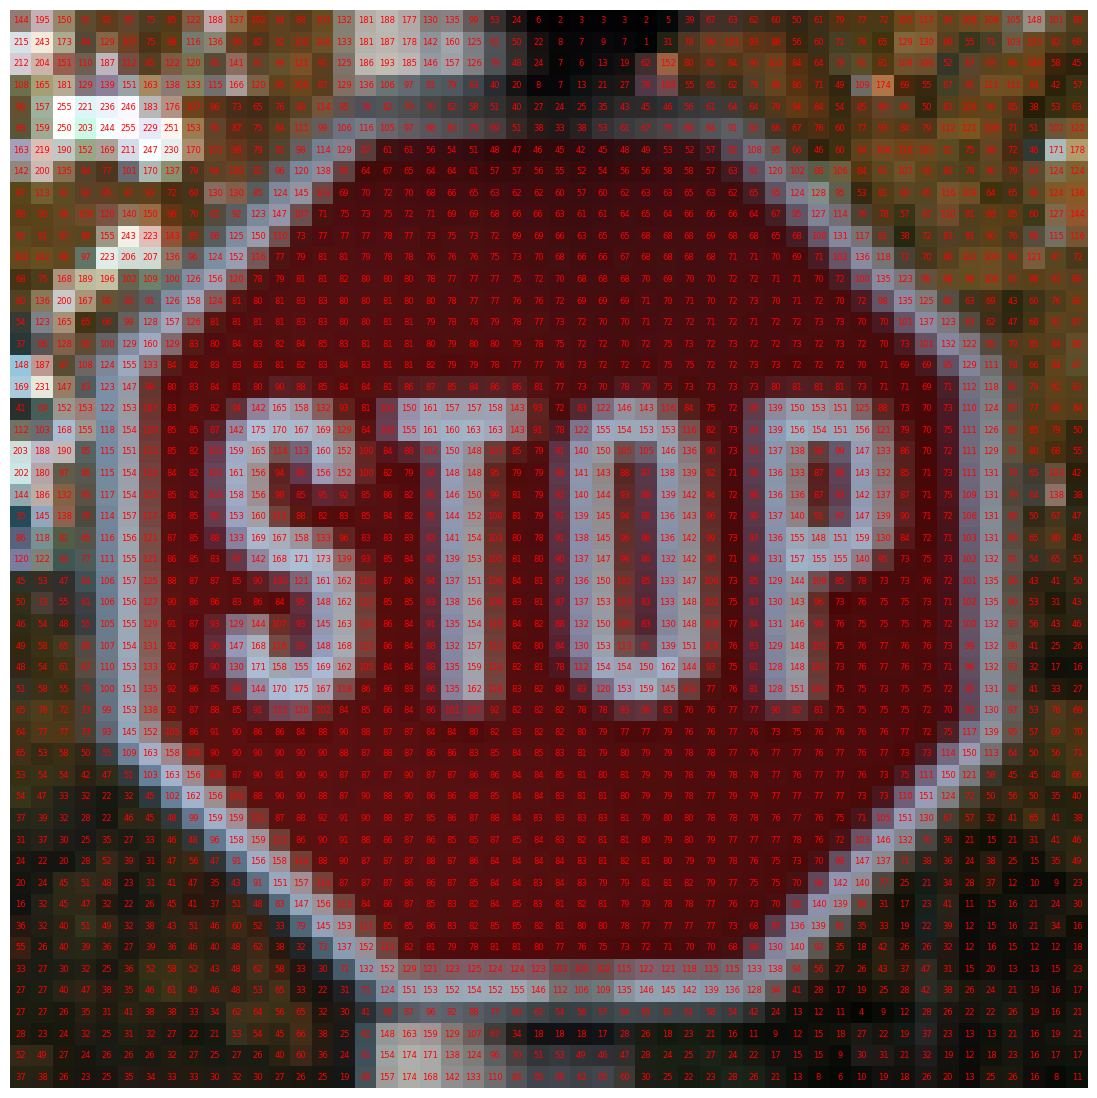

In [22]:
fig, ax = plt.subplots(figsize=(14, 14))
ax.imshow(img, cmap='gray')

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        ax.text(j, i, img[i, j][0], color='r', ha='center', va='center', size=6)
plt.axis('off')

(-0.5, 49.5, 49.5, -0.5)

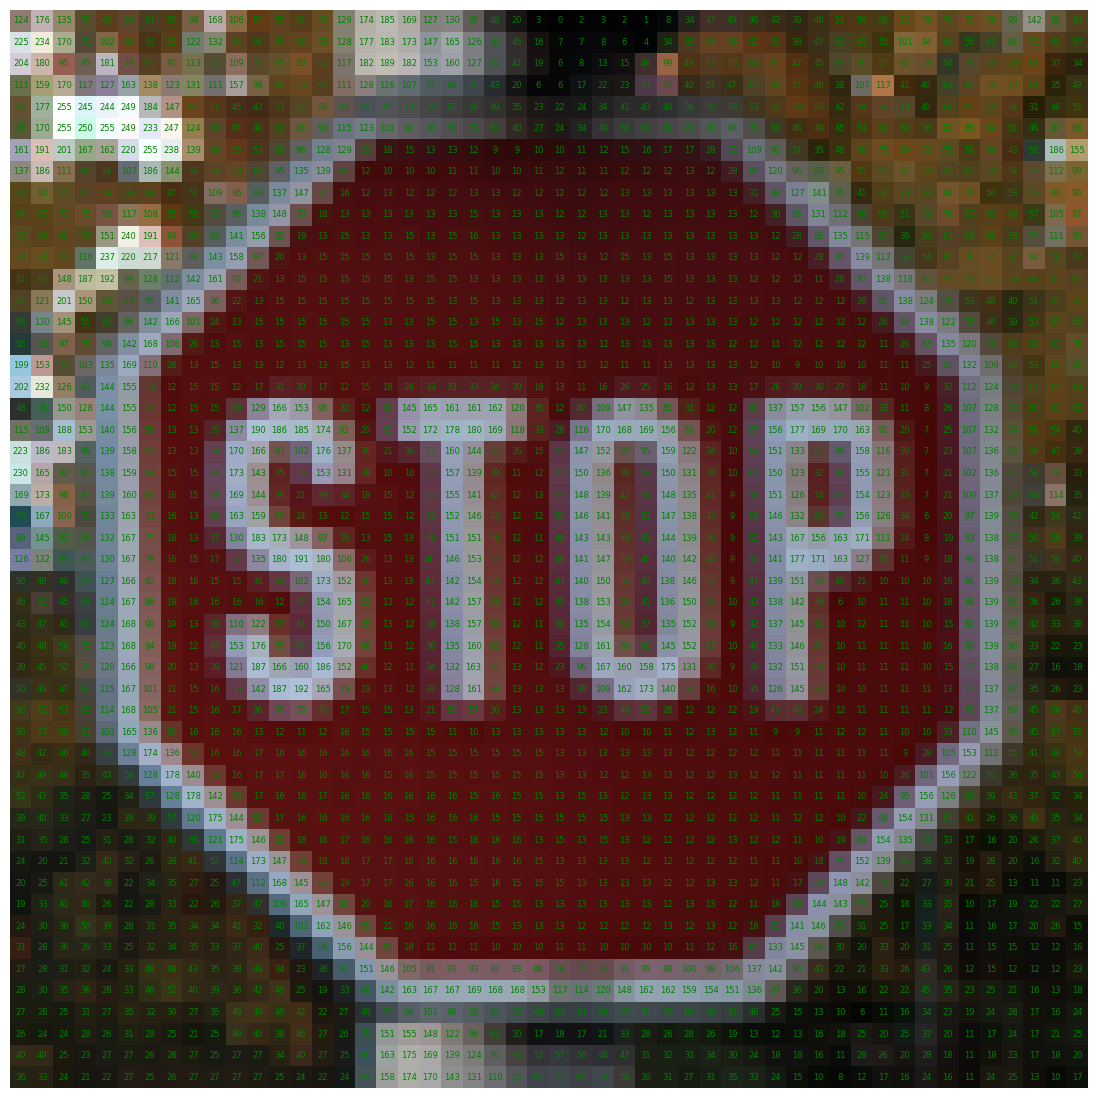

In [23]:
fig, ax = plt.subplots(figsize=(14, 14))
ax.imshow(img, cmap='gray')

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        ax.text(j, i, (img[i, j][1]), color='g', ha='center', va='center', size=6)
plt.axis('off')

(-0.5, 49.5, 49.5, -0.5)

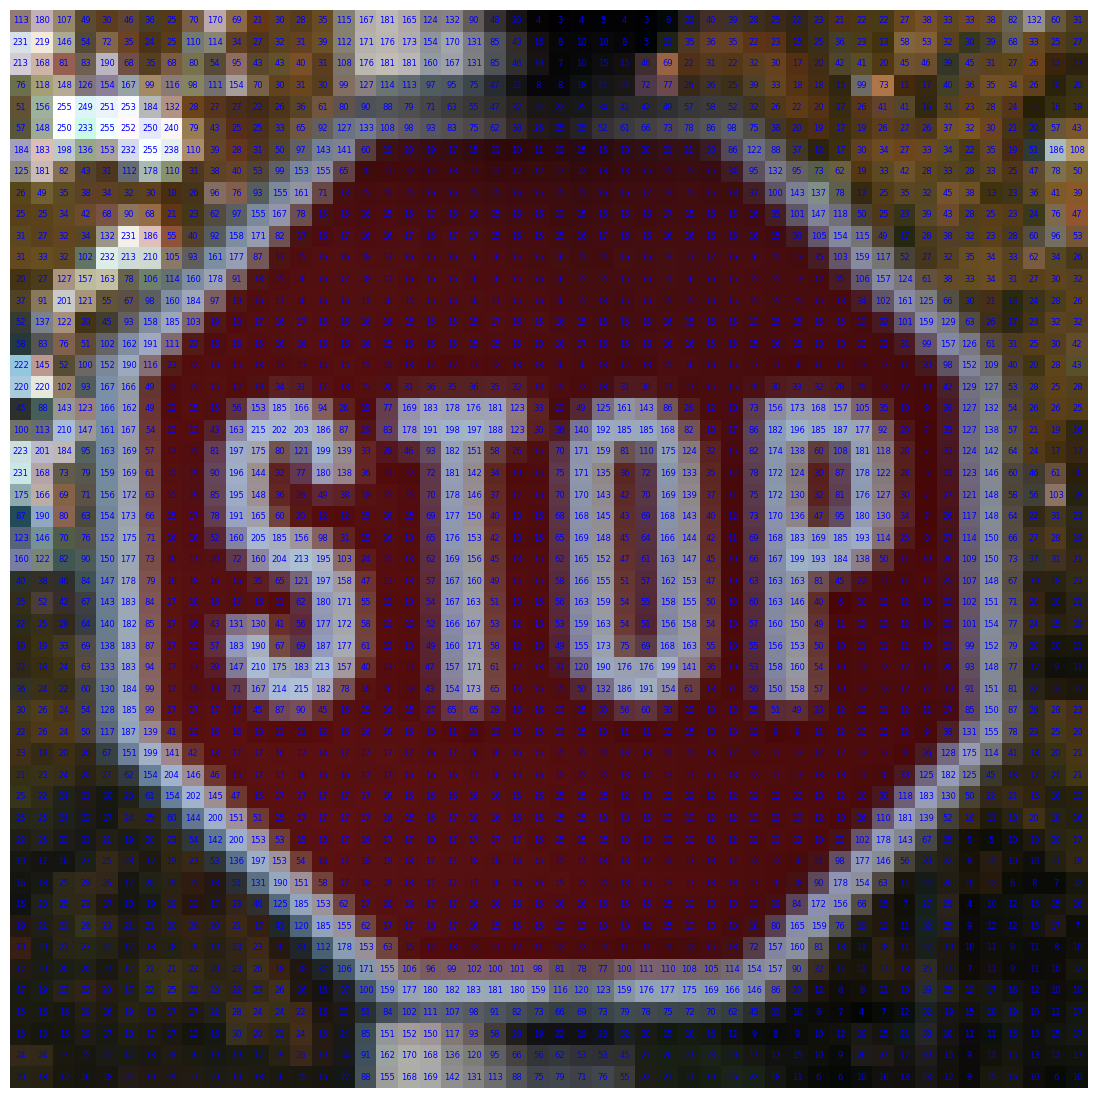

In [24]:
fig, ax = plt.subplots(figsize=(14, 14))
ax.imshow(img, cmap='gray')

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        ax.text(j, i, (img[i, j][2]), color='blue', ha='center', va='center', size=6)
plt.axis('off')

(-0.5, 47.5, 47.5, -0.5)

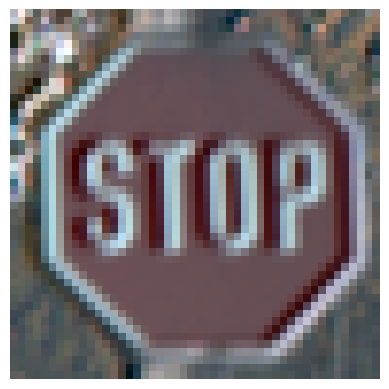

In [25]:
kernel = np.array([[2, 2, -1], [10, -1, -5], [1, -1, -1]])
filtered_image_red = convolve2D(img[:,:,0], kernel)
filtered_image_red = (filtered_image_red-np.min(filtered_image_red))/(np.max(filtered_image_red)-np.min(filtered_image_red))
filtered_image_green = convolve2D(img[:,:,1], kernel)
filtered_image_green = (filtered_image_green-np.min(filtered_image_green))/(np.max(filtered_image_green)-np.min(filtered_image_green))
filtered_image_blue = convolve2D(img[:,:,2], kernel)
filtered_image_blue = (filtered_image_blue-np.min(filtered_image_blue))/(np.max(filtered_image_blue)-np.min(filtered_image_blue))
rgb = np.dstack((filtered_image_red, filtered_image_green, filtered_image_blue))*255
rgb = rgb.astype(np.uint8)
plt.imshow(rgb)
plt.axis('off')

(-0.5, 47.5, 47.5, -0.5)

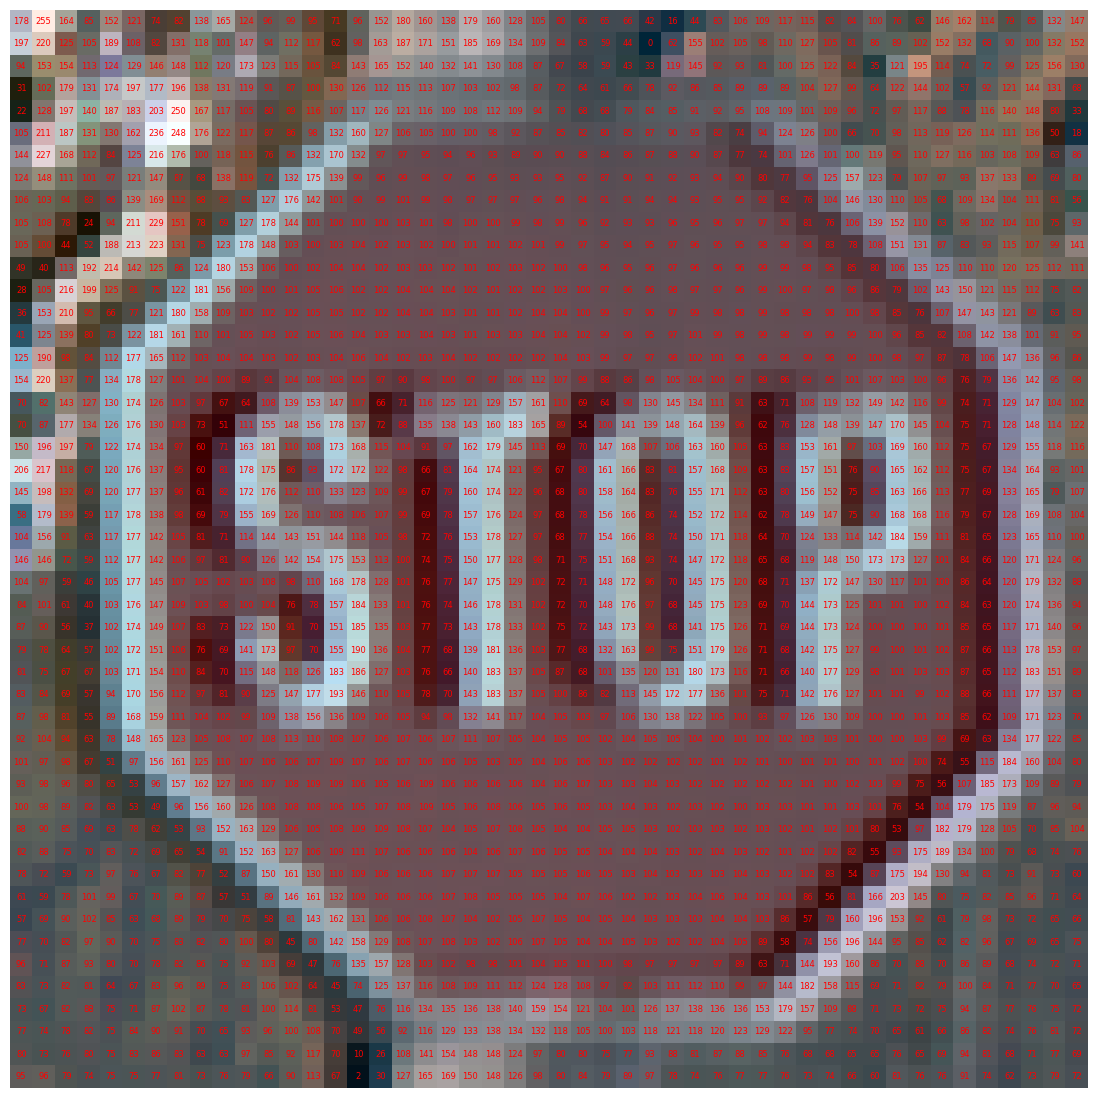

In [26]:
fig, ax = plt.subplots(figsize=(14, 14))
ax.imshow(rgb, cmap='gray')

for i in range(rgb.shape[0]):
    for j in range(rgb.shape[1]):
        ax.text(j, i, round(rgb[i, j][0], 1), color='r', ha='center', va='center', size=6)
plt.axis('off')